# Simple dataset read and save

**Remark*

Before looking into the details in this notebook, we highly suggest you finish your project part - 1 by yourself. That will greatly enhance your coding ability. 

If you truely can not solve the problem by yourself, you can look into this notebook

In [3]:
# NumPy is a library for numerical computing in Python.
import numpy as np

# The glob module in Python is used to retrieve files/pathnames matching a specified pattern.
import glob  

# Matplotlib is a plotting library for creating static, animated, and interactive visualizations in Python.
import matplotlib.pyplot as plt


## Load in the data

In [6]:
root = glob.glob('./dataset/mnist_test/*')  # get the all the folders containing images
root

['./dataset/mnist_test\\1', './dataset/mnist_test\\2']

In [7]:
images_all = []
labels_all = []
for directory in root:
    print(directory)
    label = directory.split('/')[-1]  # get the label from folder name
    img_files = glob.glob(directory+'/*.jpg')  # obtain the paths of all image files with the ".jpg" extension in the current folder
    for img_f in img_files:
        images_all.append(plt.imread(img_f,'JPG')) # read the image into numpy file
        labels_all.append(label)
print(images_all)
print(labels_all)

./dataset/mnist_test\1
./dataset/mnist_test\2
[array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   3,   0,   4,   0,   0,   0,   9,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   1,   0,   0,   0,   3,  14,   3,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   1,   4,   0,   6,   0,   5,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   5,   0,   0,   7,   0,   0,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   4,   1,   7,  12,  11,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   8,   7, 124, 244, 248,  60,   

In [8]:
images_all[0].shape

(28, 28)

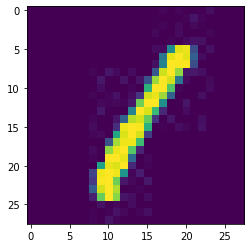

In [9]:
plt.imshow(images_all[0])

## Flatten in to $N \times D$

In [10]:
# Each image's pixel values are reshaped into a 28x28 two-dimensional array, matching the standard image size of the MNIST dataset.
X = np.array(images_all).flatten().reshape(len(images_all),28*28)

# Convert the labels_all list into a NumPy array
y = np.array(labels_all)

X.shape, y.shape

((4, 784), (4,))

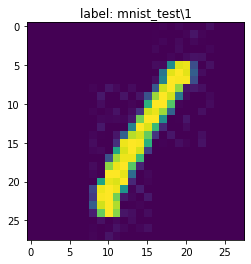

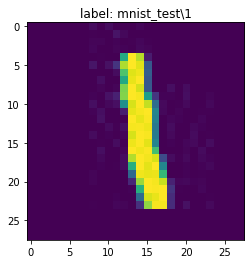

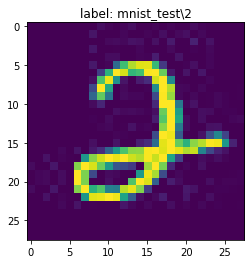

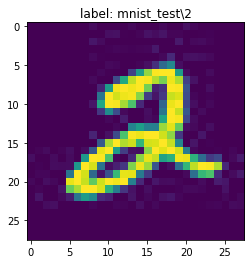

In [17]:
# Using the enumerate function, iterate through each row in X (each image data) and obtain its index (ind) and data (row).
for ind,row in enumerate(X):
    plt.imshow(row.reshape(28,28))  # reshaped into a 28x28 two-dimensional array with .reshape(28, 28)
    plt.title("label: " + y[ind])
    plt.show()

## Train test split without sklearn 

In [11]:
# Validation dataset
VALIDATION_PROPORTION = 0.3  # you can specify any number between 0-1  just the proportion of test size

np.random.seed(2)   # it ensures that the same random numbers are generated each time the code is run
probabilities = np.random.uniform(size=len(X))  # generate random numbers from a uniform distribution 

# This line checks if the random probability for each sample is less than VALIDATION_PROPORTION. 
# If it is, the corresponding element is set to True, indicating that the sample is selected for validation. 
# Otherwise, it is set to False, indicating that the sample is not used for validation.
selected_validation = probabilities<VALIDATION_PROPORTION


In [12]:
# Train dataset
probabilities = np.random.uniform(size=len(X)) 
selected_validation = probabilities<VALIDATION_PROPORTION
selected_train = ~ selected_validation  # take the binary One’s complement

In [13]:
selected_validation

array([False, False,  True, False])

In [14]:
selected_train

array([ True,  True, False,  True])

In [15]:
Train_X = X[selected_train]
Valid_X = X[selected_validation]
Train_y = y[selected_train]
Valid_y = y[selected_validation]

In [16]:
Train_X.shape

(3, 784)

## Save

In [17]:
np.save("X_train.npy", Train_X)
np.save("y_train.npy", Train_y)
np.save("X_valid.npy", Valid_X)
np.save("y_valid.npy", Valid_y)

## Load

In [39]:
X_load_back = np.load('X_valid.npy')

In [40]:
# This line checks if all elements of X_load_back are equal to the elements in Valid_X. 
# It returns True if all elements match and False if there is any difference.

(X_load_back == Valid_X).all()  # check if all right

True